 ## Project 1
 SMA strategy backtesting return analysis by using pyfolio

 import data

In [2]:
import numpy as np
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt
import yfinance as yf
from pandas import Series, DataFrame

TSMC_price_data = yf.download('2330.TW', start = '2018-01-01', end = '2022-07-18')
TSMC_price_data['Date'] = TSMC_price_data.index
print(TSMC_price_data)
TSMC_price_data['Date'] = pd.to_datetime(TSMC_price_data['Date'], format = '%Y-%m-%d')

/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close   Adj Close    Volume       Date
Date                                                                   
2018-01-02  231.5  232.5  231.0  232.5  202.319672  18055269 2018-01-02
2018-01-03  236.0  238.0  235.5  237.0  206.235550  29308091 2018-01-03
2018-01-04  240.0  240.0  236.5  239.5  208.410995  29096613 2018-01-04
2018-01-05  240.0  240.0  238.0  240.0  208.846100  22438255 2018-01-05
2018-01-08  242.0  242.5  240.5  242.0  210.586517  20233692 2018-01-08
...           ...    ...    ...    ...         ...       ...        ...
2022-07-11  468.0  470.5  461.0  462.0  462.000000  21941710 2022-07-11
2022-07-12  458.0  458.0  449.5  449.5  449.500000  23036423 2022-07-12
2022-07-13  470.5  473.0  466.0  470.5  470.500000  44035695 2022-07-13
2022-07-14  466.0  477.5  463.0  475.0  475.000000  31936258 2022-07-14
2022-07-15  481.0  494.0  477.0  492.5  492.500000  51846909 2022-0

 Setting SMA5, SMA20 line, and plot them

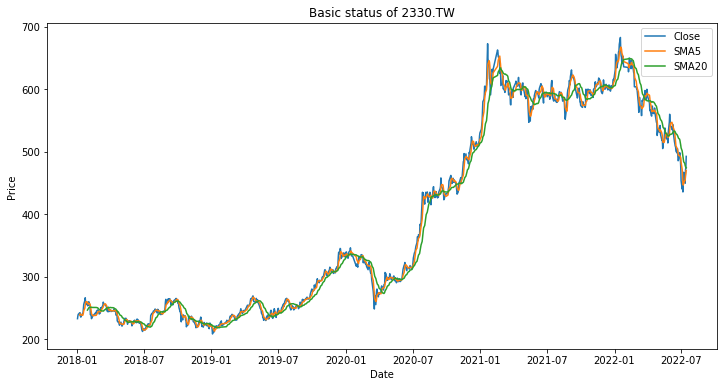

In [3]:
TSMC_price_data['Close'] = pd.to_numeric(TSMC_price_data['Close'])
TSMC_price_data['SMA5'] = TSMC_price_data['Close'].rolling(5).mean()
TSMC_price_data['SMA20'] = TSMC_price_data['Close'].rolling(20).mean()

plt.figure(figsize = (12, 6))
plt.plot(TSMC_price_data['Close'])
plt.plot(TSMC_price_data['SMA5'])
plt.plot(TSMC_price_data['SMA20'])
plt.legend(['Close', 'SMA5', 'SMA20'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Basic status of 2330.TW')
plt.show()

 My strategy: SMA5 > SMA20 is the first condition, and SMA5 < SMA20 is the second condition \
 I use an empty array to store my signal

In [4]:
condition1 = TSMC_price_data['SMA5'] >= TSMC_price_data['SMA20']
condition2 = TSMC_price_data['SMA5'] < TSMC_price_data['SMA20']
signal = []
## stock = 0

for i in range(len(TSMC_price_data)):
    if  condition1[i]:
        stock = 1
        signal.append(1)
    elif condition2[i] and stock == 1:
        stock -= 1
        signal.append(-1)
    else:
        signal.append(0)

TSMC_price_data['SMA_signal'] = pd.Series(index = TSMC_price_data.index, data = signal)

 Calculate the daily return

In [11]:
TSMC_price_data['return'] = pd.Series(np.zeros(len(TSMC_price_data)))
i = 2
for i in range(len(TSMC_price_data)):
    TSMC_price_data['return'][i] = ((TSMC_price_data['Close'][i] - TSMC_price_data['Close'][i-1]) / TSMC_price_data['Close'][i-1])
    
strat_return = np.zeros(len(TSMC_price_data))

for i in range(len(TSMC_price_data)):
    if TSMC_price_data['SMA_signal'][i] == 1:
        strat_return[i] = TSMC_price_data['return'][i+1]*TSMC_price_data['SMA_signal'][i]
    elif TSMC_price_data['SMA_signal'][i] == -1:
        strat_return[i] = TSMC_price_data['return'][i+1]*TSMC_price_data['SMA_signal'][i]

TSMC_price_data['strat_return'] = strat_return

<ipython-input-11-24d98971f2ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSMC_price_data['return'][i] = ((TSMC_price_data['Close'][i] - TSMC_price_data['Close'][i-1]) / TSMC_price_data['Close'][i-1])


/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2018-01-02
End date,2022-07-15
Total months,52
,Backtest
Annual return,6.057%
Cumulative returns,29.328%
Annual volatility,19.402%
Sharpe ratio,0.40
Calmar ratio,0.25
Stability,0.76
Max drawdown,-24.389%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,24.39,2021-01-20,2022-06-13,NaT,NaN
1,22.62,2018-02-01,2018-06-22,2019-04-23,319
2,19.84,2019-12-16,2020-04-10,2020-07-13,151
3,16.22,2020-08-07,2020-11-09,2021-01-04,107
4,14.20,2019-04-23,2019-08-23,2019-10-09,122


/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instea

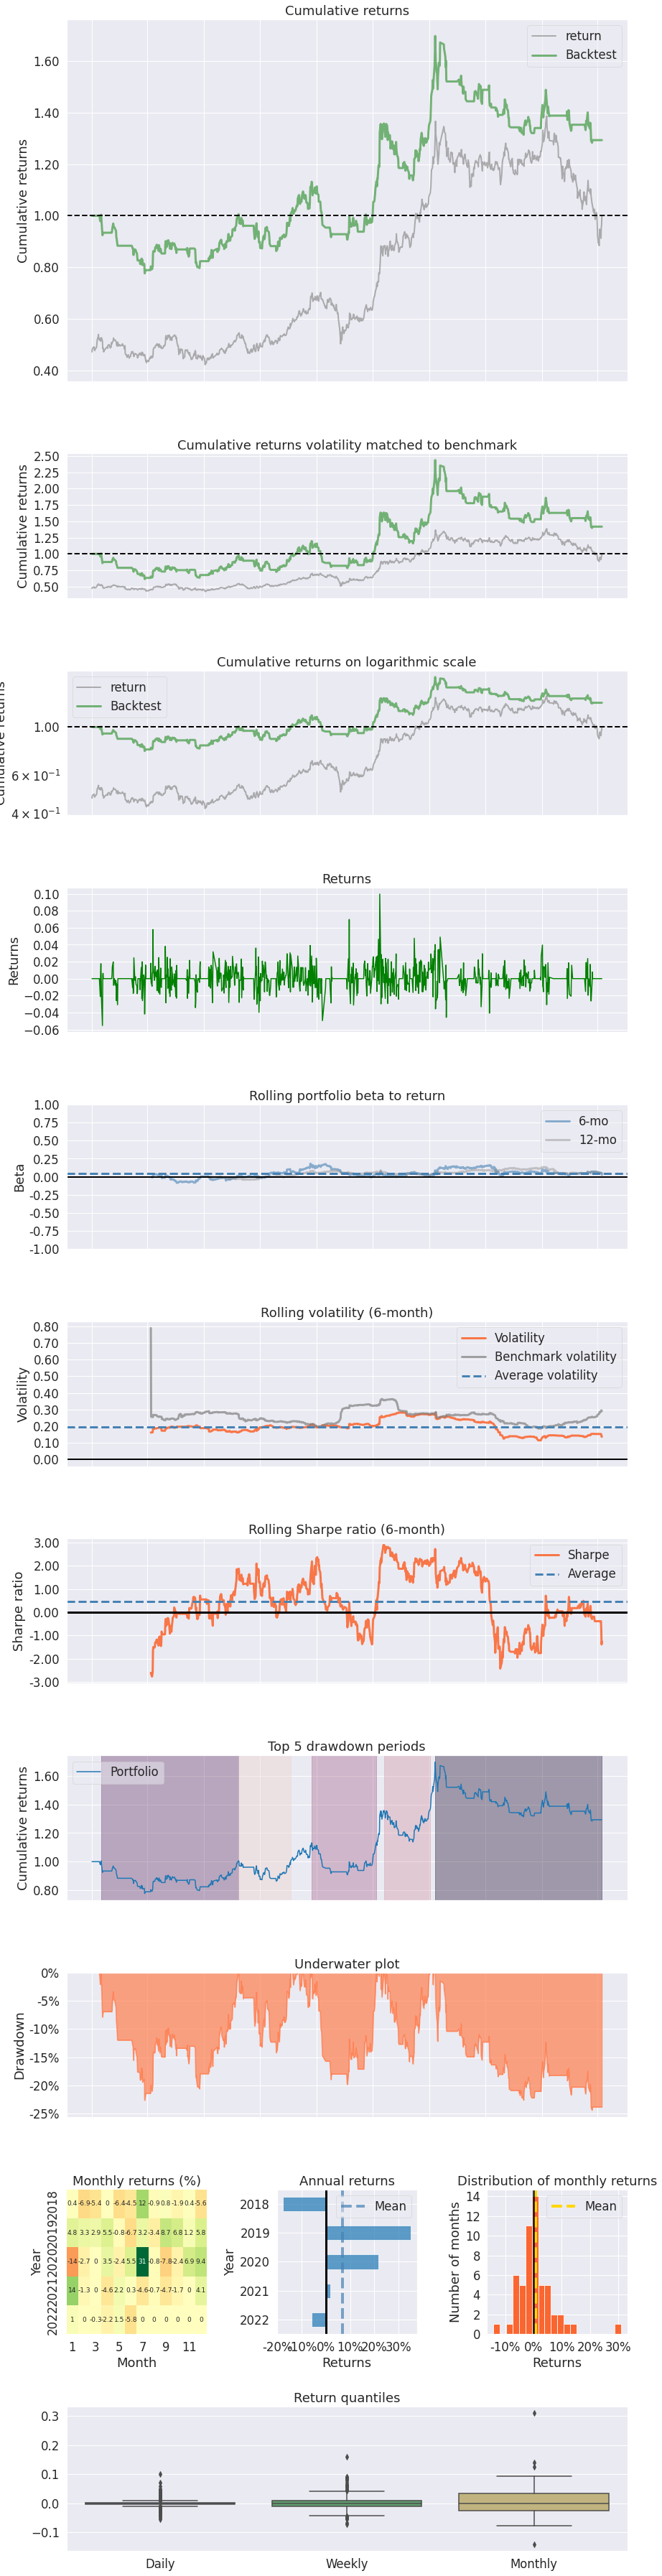

In [12]:
pf.create_returns_tear_sheet(returns = TSMC_price_data['strat_return'], benchmark_rets = TSMC_price_data['return'])

 export dataFrame to .csv file

In [13]:
TSMC_price_data = TSMC_price_data.drop(columns = ['High', 'Low', 'Adj Close', 'return'])
from pathlib import Path
filepath = Path('/Users/abnerteng/GitHub/TMBA-projects/data/TSMC_price_data.csv')
filepath.parent.mkdir(parents = True, exist_ok = True)
TSMC_price_data.to_csv(filepath)